# AAI614: Data Science & its Applications

*Notebook 5.4: Experiment with KNN*

<a href="https://colab.research.google.com/github/gassaf2/AAI614_assaf/blob/main/week5/Notebook5.4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Example I: Classifying Social Networks Ads

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [19]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

#dataset = pd.read_csv('./data.csv')
#dataset = pd.read_csv('./Social_Network_Ads.csv')
data = pd.read_csv('./data.csv', index_col='id').reset_index(drop=True)
data.drop('Unnamed: 32', axis=1, inplace=True)
#X = dataset.iloc[:, [2, 3]].values
#y = dataset.iloc[:, 4].values
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting K-NN to the Training set

Use the KNN model for training by specifying the input and output variables of the training set as follows.  Note that *p =2* refers to **euclidean distance**.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
# Calculate test set accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()
print(f'Sklearn accuracy: {accuracy(y_pred, y_test):.3f} %')

Sklearn accuracy: 95.105 %


In [25]:
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[89,  1],
       [ 6, 47]], dtype=int64)

# Example II: Classifying Digits

In [12]:
from sklearn import metrics

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [14]:
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
#Predict Output
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(x_test))
score = model.score(x_test, y_test)

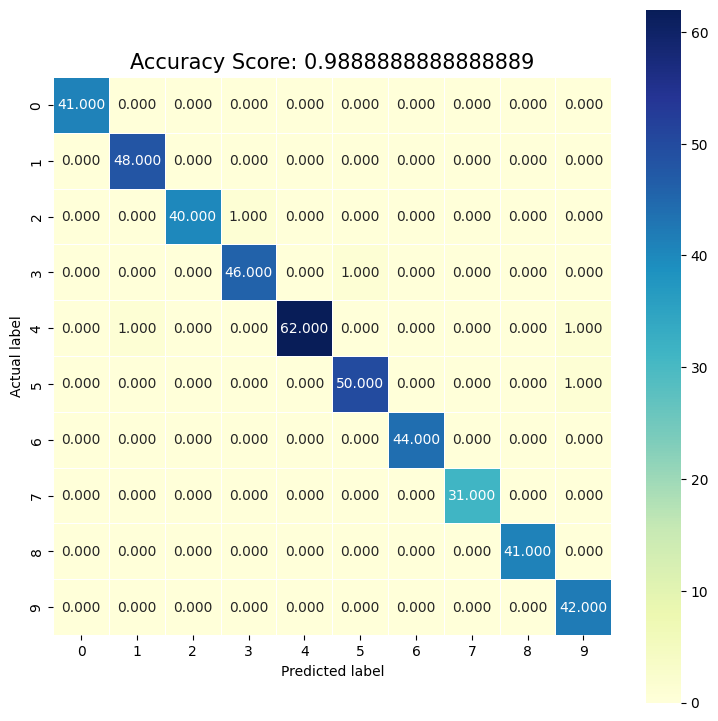

In [17]:
import seaborn as sns 
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);